In this project, I will try to visulize the global suicidal datasets and find meaningful correlation between suicides and other socio-geological factors.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['master.csv']


**Importing datasets**

In [2]:
total_suicidal=pd.read_csv("../input/master.csv")

**Showing top 5 rows of datasets**

In [3]:
total_suicidal.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


This indicates that there are multiple rows for each country for different conditions such as "Male vs Female" or "Generation X vs Boomers", and there are 12 attributes in total. 

The "Country" coulmn's repetitiveness (and some other columns' too) means that it is probably a categorical attribute. Let's see what categories exist and how many of conditions belong to each category by using the value_counts() method:

In [4]:
total_suicidal["country"].value_counts()

Austria                   382
Mauritius                 382
Netherlands               382
Iceland                   382
Ecuador                   372
United States             372
Luxembourg                372
Mexico                    372
Republic of Korea         372
Singapore                 372
Malta                     372
Brazil                    372
United Kingdom            372
Colombia                  372
Spain                     372
Chile                     372
Greece                    372
Puerto Rico               372
Israel                    372
Belgium                   372
Japan                     372
Italy                     372
Argentina                 372
Costa Rica                360
Norway                    360
Bulgaria                  360
France                    360
Guatemala                 360
Ireland                   360
Australia                 360
                         ... 
Estonia                   252
Switzerland               252
Slovenia  

**Getting information about datasets**

Let's get a quick description of the data, in particular the total number of rows, and each attribute's type and number of non-null values

In [5]:
total_suicidal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


Because there are only 8364 non-null instances for "HDI for year" attribute while there are 27,820 instances in total, we can expect about ~19,000 null instances in "HDI for year".
Also, since this data came from a CSV file, the "object" type must indicate a text attribute.

**Using DESCRIBE method for a summary**

The describe() method shows a summary of the numerical attributes:

In [6]:
total_suicidal.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


Note that the null values are ignored as you can see in the 'count' of "HDI for year". The std row shows the standard deviation. The 25%,50% and 75% rows show the corresponding percentiles below which a given percentage of observations in a group of observations falls.

**Plotting histogram**

Let's plot a histogram for each numerical attribute to better understand the type of data we are dealing with although this does not directly show any correlation yet.

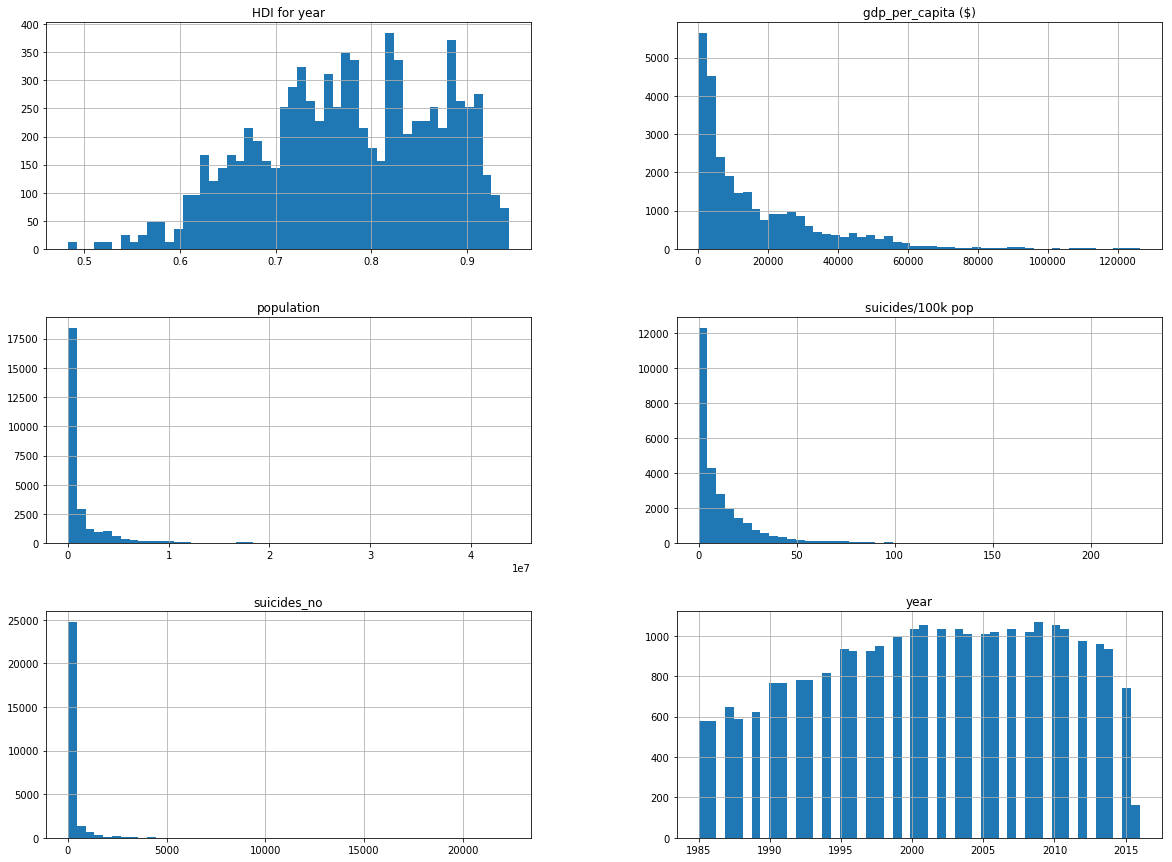

In [7]:
import matplotlib.pyplot as plt
total_suicidal.hist(bins=50, figsize=(20,15))
plt.show()

**Data visualization**

* Global trend of suicides as a function of year

We can take a quick look at the data by visualizing some of the features.
Let's first take a look at the global trend of suicides. For this we first need to sum of the number of suicides for each year:

In [8]:
year_grouped=total_suicidal.groupby("year")

We will now sum them up for each year:

In [9]:
year_grouped_sum=year_grouped.sum()

In [10]:
import seaborn as sns

[Text(0, 0.5, 'Suicides / 100k population'), Text(0.5, 0, 'Year')]

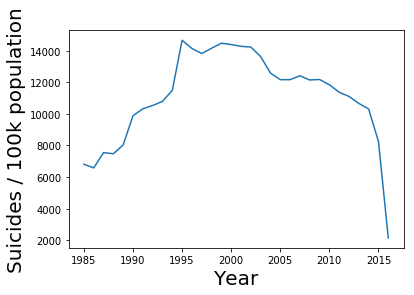

In [11]:
plt.rcParams["axes.labelsize"] = 20
ax = sns.lineplot(x='year', y="suicides/100k pop", data=year_grouped_sum.reset_index())
ax.set(xlabel='Year', ylabel='Suicides / 100k population')

We can see that there is a dramatic drop in the total number of suicides past year 2015.

* Suicides by gender

Let's see how gender has affected suicides.

In [12]:
gender_grouped=total_suicidal.groupby("sex")

In [13]:
gender_grouped_sum=gender_grouped.sum()

In [14]:
gender_grouped_sum=gender_grouped_sum.reset_index()

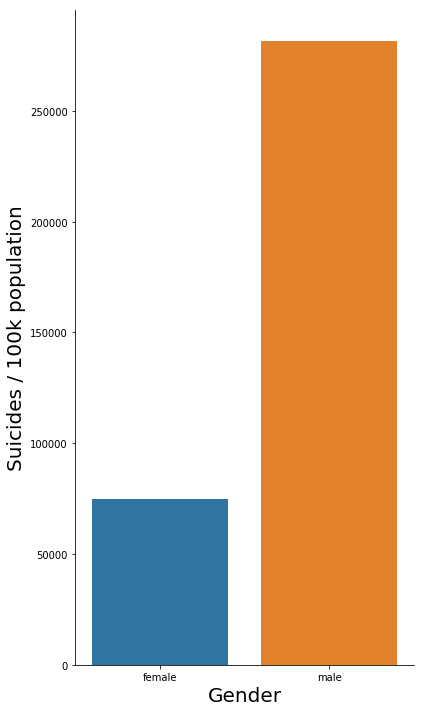

In [15]:
plt.rcParams["axes.labelsize"] = 20
ax=sns.catplot(x='sex', y='suicides/100k pop', 
            data=gender_grouped_sum, kind="bar", height=10, aspect=0.6)
ax.set(xlabel='Gender', ylabel='Suicides / 100k population')
plt.show()

We can clearly see that men have committed more suicides than women

* Suicides by country

Same thing as above but now for each country

In [16]:
country_grouped=total_suicidal.groupby("country")

In [17]:
country_grouped_sum=country_grouped.sum()

In [18]:
country_grouped_sum=country_grouped_sum.reset_index()

In [19]:
country_grouped_sum_sorted=country_grouped_sum.sort_values('suicides/100k pop')

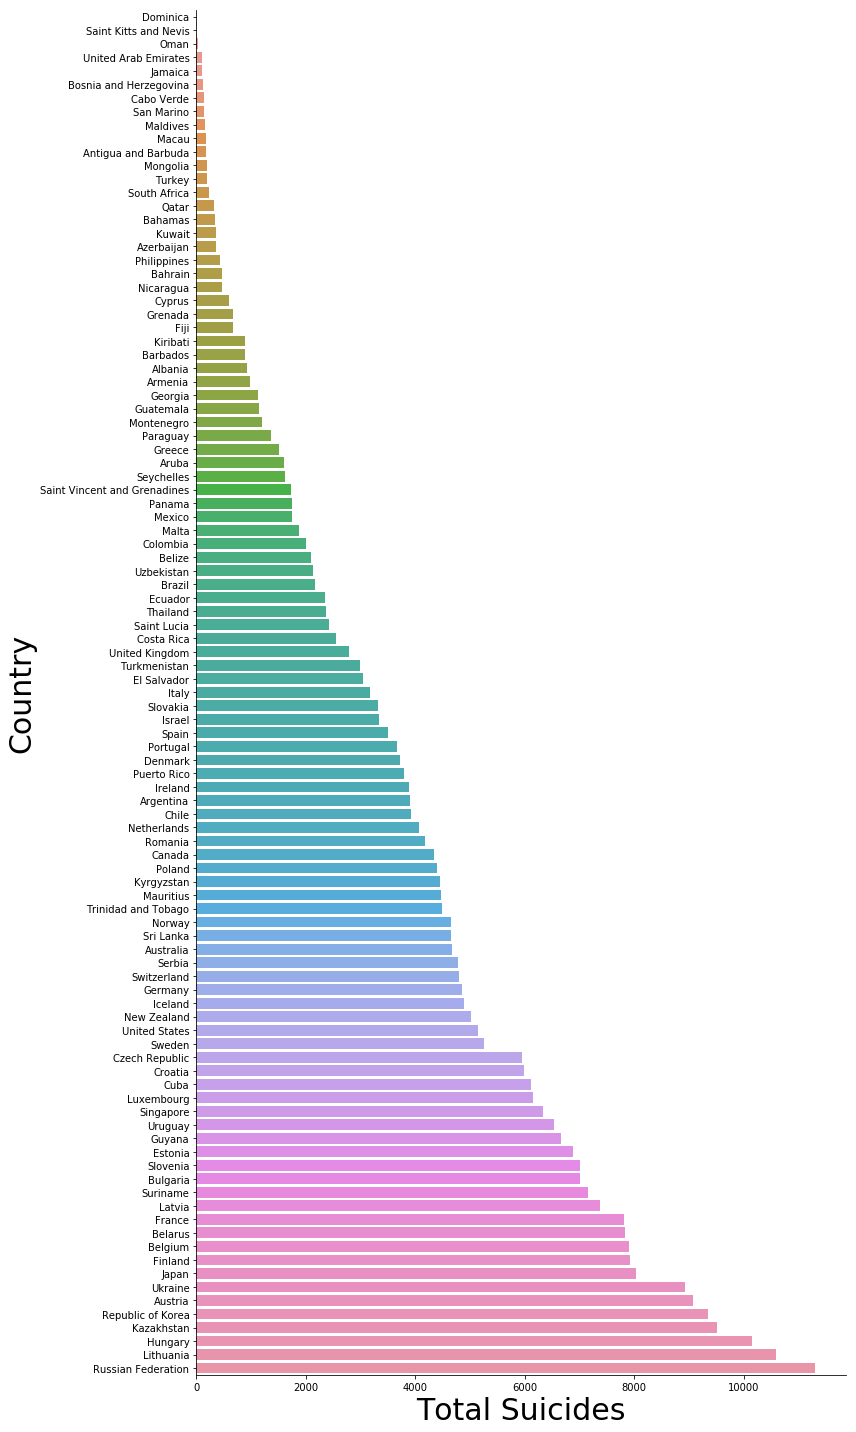

In [20]:
plt.rcParams["axes.labelsize"] = 30
ax=sns.catplot(x='suicides/100k pop', y='country', 
            data=country_grouped_sum_sorted, kind="bar", height=20, aspect=0.6)
ax.set(xlabel='Total Suicides', ylabel='Country')
plt.show()

From the figure above, we can see that Russian Federation was the country with the highest number of suicides over the years between 1985 and 2016.

* Suicides by generation

We can also compare generation by generation.

In [21]:
gen_grouped=total_suicidal.groupby("generation")

In [22]:
gen_grouped_sum=gen_grouped.sum()

In [23]:
gen_grouped_sum=gen_grouped_sum.reset_index()

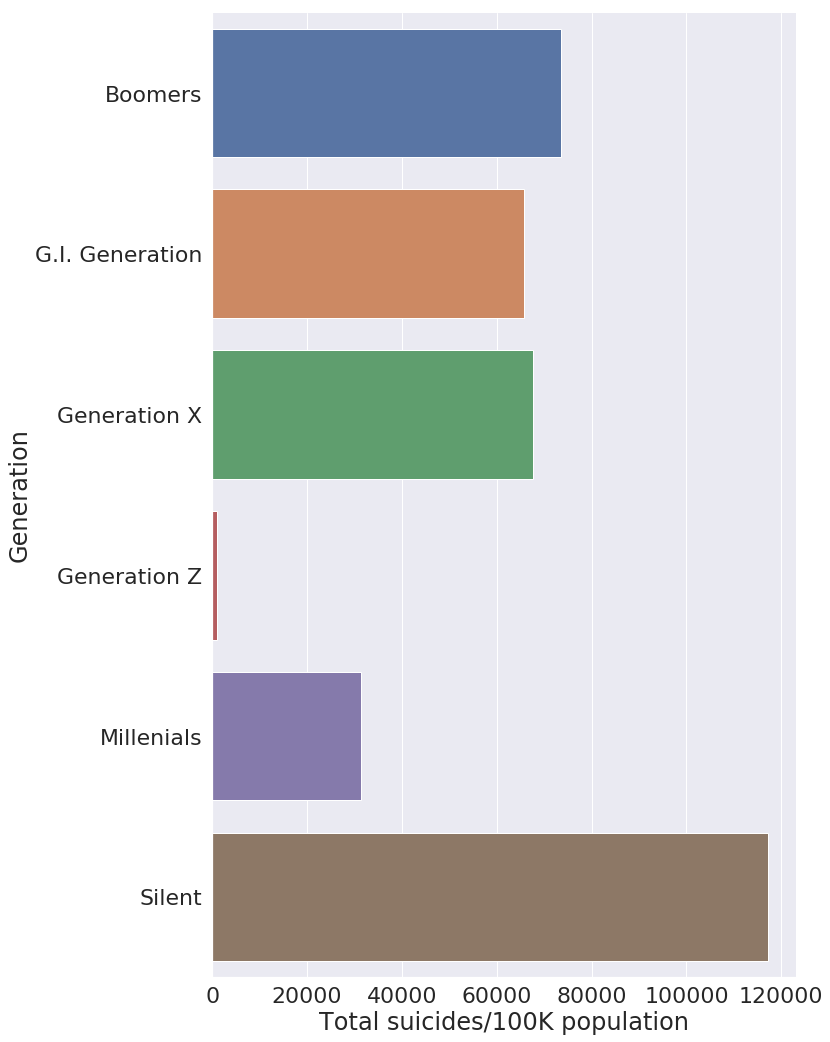

In [24]:
plt.rcParams["axes.labelsize"] = 40
sns.set(font_scale=2)
ax=sns.catplot(x='suicides/100k pop', y='generation', 
            data=gen_grouped_sum, kind="bar", height=15, aspect=0.8)
ax.set(xlabel='Total suicides/100K population', ylabel='Generation')
plt.show()

This hows that the "Silent" generation has committed the most number of suicides/100K population across all years and countries.

* GDP effect on suicides

Now, let's take a deeper look into the GDP effect on suicides. I will choose "GDP per capita" for every conntry across all the available years for my analysis. Because GDP per capita is changing over the years, I will choose an average for this. For the same reason, I will take an average for suicides/100k population data.

In [25]:
se=total_suicidal.groupby(['country','year'])['suicides/100k pop'].mean().reset_index().groupby('country').mean()

In [26]:
se=se.reset_index()

In [27]:
se2=total_suicidal.groupby(['country','year'])['gdp_per_capita ($)'].mean().reset_index().groupby('country').mean()

In [28]:
se2=se2.reset_index()

In [29]:
se['100k_avg']=se["suicides/100k pop"]

In [30]:
se['gdp_per_capita_average']=se2["gdp_per_capita ($)"]

In [31]:
se.head()

,country,year,suicides/100k pop,100k_avg,gdp_per_capita_average
0,Albania,1999.227273,3.502879,3.502879,1859.045455
1,Antigua and Barbuda,1999.481481,0.552901,0.552901,10448.185185
2,Argentina,2000.000000,10.469328,10.469328,7914.096774
3,Armenia,2002.880000,3.281073,3.281073,1886.680000
4,Aruba,2004.285714,9.503095,9.503095,24221.642857


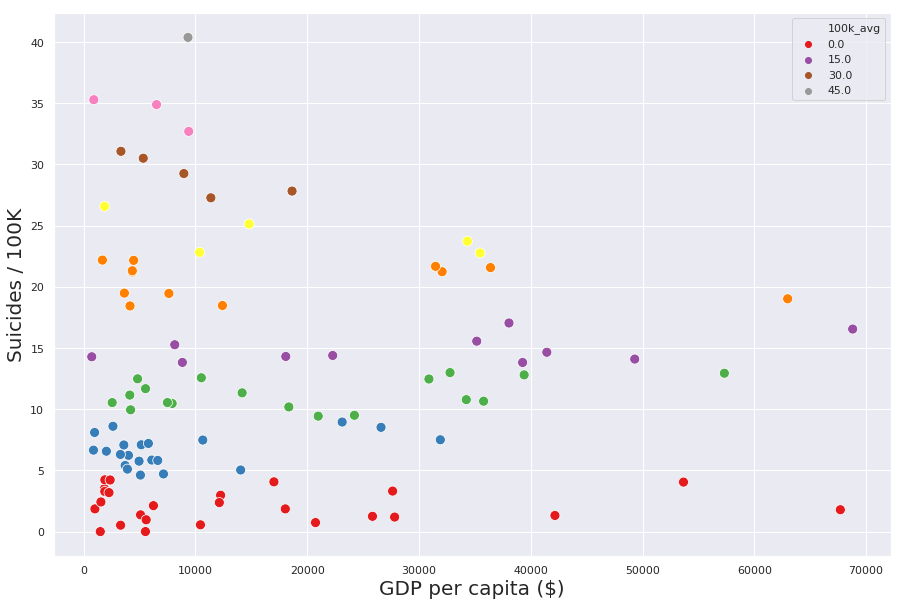

In [32]:
sns.set(rc={'figure.figsize':(15,10)})
plt.rcParams["axes.labelsize"] = 20
ax=sns.scatterplot(x='gdp_per_capita_average', y='100k_avg', s=100, hue="100k_avg",palette="Set1",data=se)
ax.set(xlabel='GDP per capita ($)', ylabel='Suicides / 100K')
plt.show()

Let's try to fit a linear model to this data just for our initial try. First, I will create numpy arrays for "GDP per capita" and "Suicides/100K pop" attributes.

In [33]:
se_num_X=se["gdp_per_capita_average"]

In [34]:
se_num_Y=se["100k_avg"]

In [35]:
se_num=pd.concat([se_num_X,se_num_Y],axis=1)

In [36]:
se_num_Xarray=se_num_X.values.reshape(-1,1)

In [37]:
se_num_Yarray=se_num_Y.values.reshape(-1,1)

Loading linear regression model

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lin_reg=LinearRegression()

In [40]:
lin_reg.fit(se_num_Xarray,se_num_Yarray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print("Y intercept value is", lin_reg.intercept_)

Y intercept value is [11.67517113]


In [42]:
print("Slope is", lin_reg.coef_)

Slope is [[2.19479952e-05]]


Let's plot the predicted data (red) along with the original data (gray).

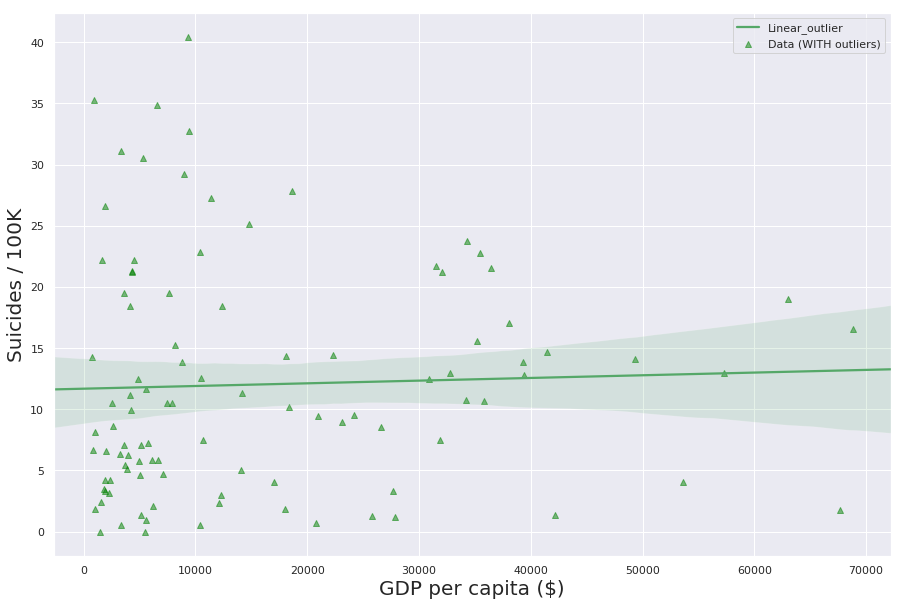

In [43]:
plt.scatter(se_num_X, se_num_Y, label='Data (WITH outliers)', color='green', marker='^', alpha=.5)
ax=sns.regplot(x='gdp_per_capita_average', y='100k_avg', data=se_num, scatter=None, color="g",label="Linear_outlier")
ax.set(xlabel='GDP per capita ($)', ylabel='Suicides / 100K')
plt.legend(loc="best")
plt.show()

It does not look super bad, but not very convincing either. Let's remove some of the outliers based on the Zscore values.

In [44]:
from scipy.stats import zscore

In [45]:
se_Y_zscore=zscore(se_num_Y)

Let's use a threshold of 3 for our Zscore filtering

In [46]:
se_bool_Y=np.absolute(se_Y_zscore)<3

In [47]:
se_bool_series=pd.Series(se_bool_Y)

In [48]:
new_se=pd.concat([se_num_X,se_num_Y,se_bool_series],axis=1)

In [49]:
new_se=new_se[new_se[0]]

Let's rerun linear regression without the outlier point.

In [50]:
new_se_num_Xarray=new_se["gdp_per_capita_average"].values.reshape(-1,1)

In [51]:
new_se_num_Yarray=new_se["100k_avg"].values.reshape(-1,1)

In [52]:
lin_reg.fit(new_se_num_Xarray,new_se_num_Yarray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print("Y intercept value is", lin_reg.intercept_)

Y intercept value is [11.2764365]


In [54]:
print("Slope is", lin_reg.coef_)

Slope is [[2.90545364e-05]]


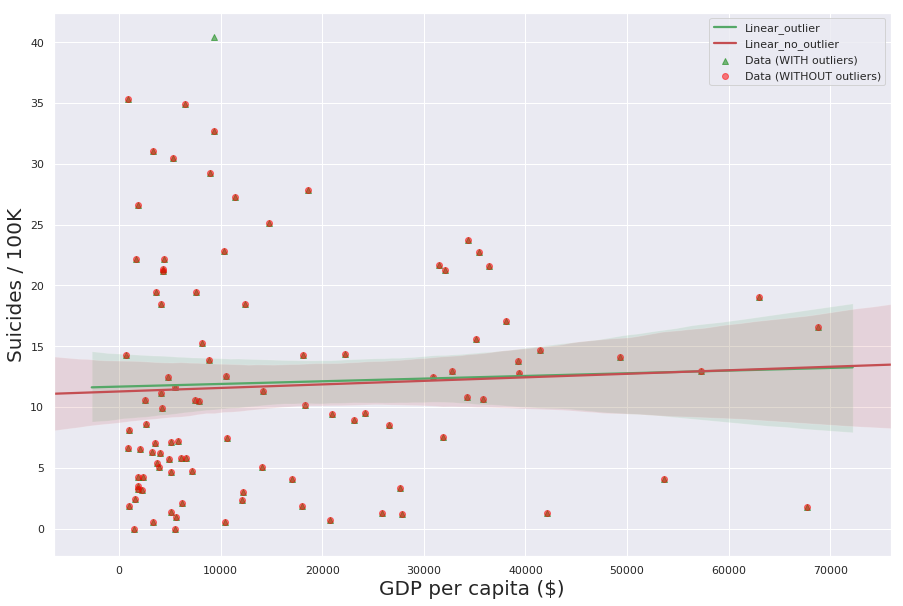

In [55]:
plt.scatter(se_num_X, se_num_Y, label='Data (WITH outliers)', color='green', marker='^', alpha=.5)
sns.regplot(x='gdp_per_capita_average', y='100k_avg', data=se_num, scatter=None, color="g",label="Linear_outlier")
plt.scatter(new_se["gdp_per_capita_average"], new_se["100k_avg"], label='Data (WITHOUT outliers)', color='red', marker='o', alpha=.5)
ax=sns.regplot(x='gdp_per_capita_average', y='100k_avg', data=new_se, scatter=None, marker="^",color="r",label="Linear_no_outlier")
ax.set(xlabel='GDP per capita ($)', ylabel='Suicides / 100K')
plt.legend(loc="best")
plt.show()

We can see that there was only one outlier (Lithuania in the actual dataset), and there is also a slight linearly increasing trend even without the outlier. However, the overdata is pretty scattered, and thus it should not be concluded that GDP per capita directly and linearly affects suicides.

* Linearity test

Before we move onto some prediction work, let's find which country has a linearly increasing suicidal trend **over YEARS** for easiness.
We will test this through hypothesis test for regression slope.

In [56]:
se3=total_suicidal.groupby(['country','year'])['suicides/100k pop'].sum().unstack()

In [57]:
se3=se3.reset_index()

In [58]:
se3.head()

year,country,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,31.85,32.46,33.40,NaN,NaN,18.00,32.56,32.18,40.55,43.62,77.43,66.52,69.81,30.70,50.62,62.51,58.60,65.39,0.00,0.00,65.85,71.05,0.00,41.66,NaN,NaN,NaN,NaN,NaN,NaN
1,Antigua and Barbuda,0.00,0.0,0.00,0.00,0.00,17.24,0.00,0.00,15.00,0.00,0.00,NaN,NaN,0.00,0.00,39.97,19.45,0.00,27.82,36.06,0.00,0.00,7.98,0.00,0.00,NaN,NaN,0.00,0.00,0.00,15.62,NaN
2,Argentina,134.47,152.9,144.98,146.24,138.93,134.90,119.24,126.86,134.77,122.05,119.97,118.03,111.40,116.93,117.19,131.39,143.56,139.42,146.29,131.06,128.18,128.22,118.35,118.11,107.32,111.24,105.87,119.82,103.42,111.35,112.13,NaN
3,Armenia,NaN,NaN,NaN,NaN,NaN,41.12,45.87,40.86,51.05,66.73,51.79,37.05,32.23,27.42,24.68,34.30,29.78,38.07,33.43,NaN,NaN,43.67,39.02,35.15,33.70,40.41,32.98,36.57,37.48,37.01,45.28,40.56
4,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,308.51,NaN,NaN,NaN,115.47,305.33,27.28,126.46,12.93,176.72,99.58,96.31,92.19,41.44,42.23,58.65,93.42,NaN,NaN,NaN,NaN,NaN


Transposing datasets for easiness

In [59]:
se3=se3.T.reset_index()

In [60]:
se3.columns = se3.iloc[0]

In [61]:
se3=se3.rename(columns = {'country':'year'})

In [62]:
se3=se3.drop([0])

In [63]:
se3=se3.replace('NaN', np.NaN)

In [64]:
se3.head()

,year,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Barbados,Belarus,Belgium,Belize,Bosnia and Herzegovina,Brazil,Bulgaria,Cabo Verde,Canada,Chile,Colombia,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Denmark,Dominica,Ecuador,El Salvador,Estonia,Fiji,Finland,France,Georgia,Germany,Greece,Grenada,Guatemala,...,Netherlands,New Zealand,Nicaragua,Norway,Oman,Panama,Paraguay,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Korea,Romania,Russian Federation,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and Grenadines,San Marino,Serbia,Seychelles,Singapore,Slovakia,Slovenia,South Africa,Spain,Sri Lanka,Suriname,Sweden,Switzerland,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
1,1985,NaN,0.0,134.47,NaN,NaN,163.41,384.81,NaN,4.76,20.12,61.72,NaN,332.04,NaN,NaN,59.18,303.12,NaN,166.46,108.91,62.56,69.46,NaN,NaN,NaN,NaN,NaN,0.0,82.52,NaN,NaN,NaN,NaN,348.90,NaN,NaN,58.17,25.08,NaN,...,159.89,153.64,NaN,NaN,NaN,51.06,39.42,NaN,NaN,164.82,154.61,NaN,146.65,NaN,NaN,NaN,NaN,32.79,NaN,NaN,156.18,353.36,NaN,NaN,NaN,114.93,558.72,470.84,NaN,NaN,82.54,30.17,NaN,NaN,NaN,NaN,116.45,184.72,178.61,NaN
2,1986,NaN,0.0,152.90,NaN,NaN,175.79,401.80,NaN,NaN,NaN,36.73,NaN,314.69,19.37,NaN,57.16,275.48,NaN,190.11,90.94,50.11,89.84,NaN,NaN,NaN,NaN,NaN,NaN,76.54,NaN,NaN,NaN,NaN,351.77,NaN,NaN,61.21,NaN,42.84,...,158.28,178.67,NaN,163.62,NaN,60.91,26.76,NaN,NaN,165.53,178.23,NaN,143.31,NaN,NaN,NaN,59.95,0.00,NaN,NaN,23.26,324.61,NaN,NaN,NaN,119.83,529.80,211.99,NaN,NaN,71.91,123.13,NaN,NaN,NaN,NaN,112.01,191.65,172.47,NaN
3,1987,31.85,0.0,144.98,NaN,NaN,188.82,405.88,NaN,13.59,25.68,29.46,NaN,327.76,31.41,NaN,70.12,308.40,NaN,179.33,89.42,45.17,85.56,NaN,NaN,NaN,NaN,NaN,NaN,62.53,NaN,NaN,NaN,347.35,331.03,NaN,NaN,63.06,NaN,57.92,...,157.17,210.52,NaN,191.56,NaN,67.06,36.60,NaN,NaN,171.33,143.76,NaN,128.24,NaN,NaN,NaN,141.42,0.00,NaN,NaN,60.72,273.56,NaN,NaN,NaN,122.14,NaN,251.70,230.91,NaN,81.82,155.54,NaN,173.61,294.04,NaN,103.81,191.66,164.43,NaN
4,1988,32.46,0.0,146.24,NaN,NaN,179.32,357.64,NaN,NaN,24.80,57.39,NaN,283.80,NaN,NaN,65.36,292.49,NaN,175.38,94.90,50.64,88.98,NaN,NaN,NaN,NaN,NaN,NaN,75.29,NaN,NaN,NaN,354.04,312.72,NaN,NaN,60.12,46.80,47.24,...,147.60,205.03,NaN,208.50,NaN,60.19,NaN,NaN,NaN,137.75,161.69,NaN,114.58,NaN,NaN,NaN,182.21,NaN,NaN,NaN,NaN,360.19,NaN,NaN,NaN,127.28,NaN,209.72,231.67,NaN,NaN,228.75,NaN,162.45,286.72,NaN,114.55,187.71,164.46,NaN
5,1989,33.40,0.0,138.93,NaN,NaN,168.11,359.32,NaN,NaN,NaN,73.58,NaN,284.85,5.16,NaN,64.02,292.19,NaN,170.98,100.44,41.69,84.77,NaN,NaN,NaN,NaN,NaN,NaN,70.38,NaN,NaN,NaN,373.36,312.53,NaN,NaN,54.53,65.09,35.23,...,136.01,190.62,NaN,197.89,NaN,55.29,35.33,NaN,NaN,130.32,169.54,NaN,121.40,157.77,398.82,NaN,88.91,NaN,NaN,NaN,NaN,354.11,NaN,NaN,NaN,126.49,NaN,212.12,238.34,NaN,NaN,198.16,NaN,135.33,316.32,NaN,99.19,182.44,196.46,NaN


In [65]:
column_length=len(se3.columns)

Data needs to be processed a bit to exclude the rows with "NaN" values. Also, we will choose those datasets that show R^2 values higher than 0.8 as the datasets that match very well with linear regression.

In [66]:
from sklearn.metrics import r2_score

In [67]:
index_append=[]
r2_append=[]
coeff_append=[]
for x in range(1,column_length):
    new_series=pd.concat([se3['year'],se3.iloc[:,x]], axis=1)
    new_series2=new_series.dropna()
    new_data=pd.DataFrame(new_series2).reset_index()
    year_array=new_data['year'].values.reshape(-1,1)
    sui_array=new_data.iloc[:,2].values.reshape(-1,1)
    lin_reg.fit(year_array,sui_array)
    coeff=lin_reg.coef_
    y_pred = lin_reg.predict(year_array)
    r2_sklearn = r2_score(sui_array,y_pred) 
    if 0.8<r2_sklearn<1:
        index_append.append(x)
        r2_append.append(r2_sklearn)
        coeff_append.append(coeff)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [68]:
scal_coeff=[]
for x in coeff_append:
    co=np.asscalar(x)
    scal_coeff.append(co)
print(scal_coeff)

[-7.182971041055721, -3.9153467741935466, -6.336324805339263, -2.104645320197045, -6.097741389045737, -8.994117391304348, -5.4888217338217355, -5.435330321852062, -16.268090909090905, -7.56377339901478, -5.382622914349277, -4.763052991452989, -13.33984615384615, -1.8872016129032254, -6.192451282051278, -13.919389610389606, -12.39520045172219, 0.789431451612903, 1.2709612341772147, 14.683447580645156, -4.280322580645163, -6.828885448916407, -7.2105887096774195, -9.411675324675322, -10.67690296946885, -3.0435817575083415, -6.7696233766233735]


In [69]:
cols=se3.columns

In [70]:
L=[]
L2=[]
for x in range(0,len(index_append)):
    new_country=cols[index_append[x]]
    L.append(new_country)
se4=pd.DataFrame(L, columns=['country'])
se5=pd.DataFrame(r2_append, columns=['R^2'])
se_co=pd.DataFrame(scal_coeff, columns=['coeff'])
se6=pd.concat([se4,se5,se_co], axis=1)
#se_sign=se6['coeff'].apply(lambda x: x<0)
#se6['negative']=se_sign
se6.loc[se6.coeff<0, 'sign']='Negative trend'
se6.loc[se6.coeff>0, 'sign']='Positive trend'

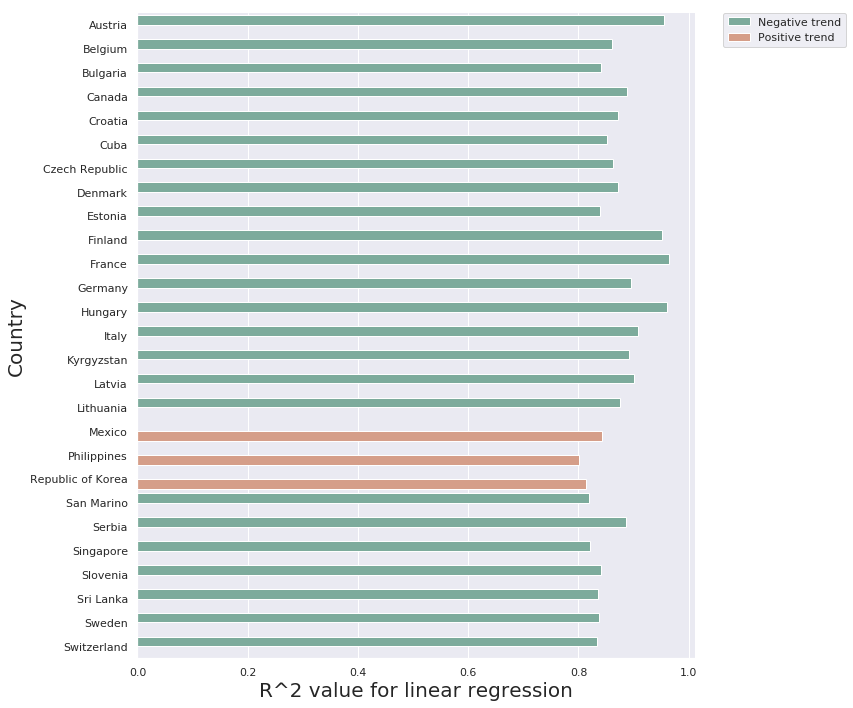

In [71]:
ax = sns.catplot(x="R^2", y="country", data=se6, saturation=0.5, kind="bar", hue="sign",ci=None, height=10,aspect=1,palette="Set2",legend=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='R^2 value for linear regression', ylabel='Country')

Now let's see how these countries look. For negatively trending countries, I will look at Finland, France and Hungary while I will look at Mexico, Phillippines and Republic of Korea for the postively trending countries.

In [72]:
L=['Finland','France','Hungary','year']

In [73]:
se_N=se3[L]

In [74]:
se_N=se_N.reset_index()

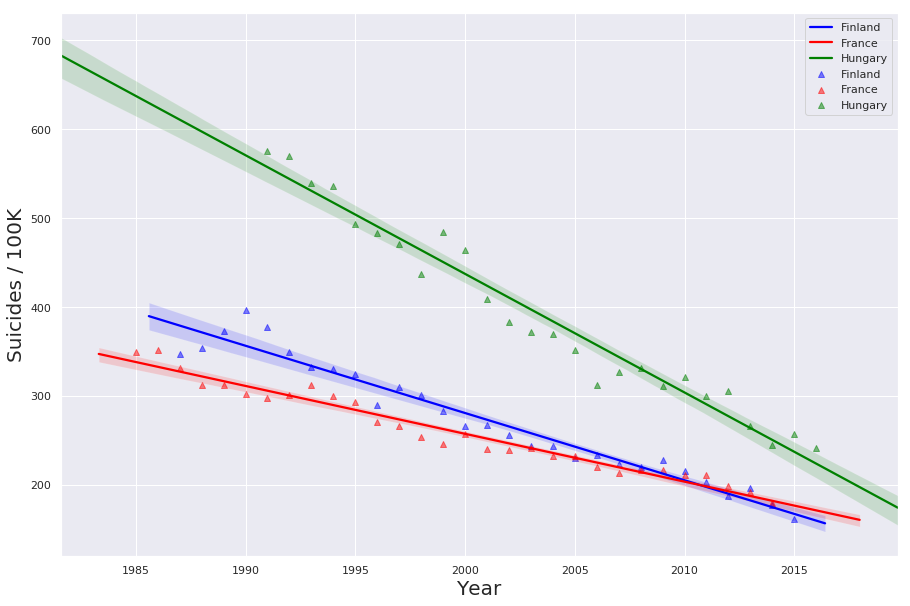

In [75]:
plt.scatter(se_N['year'], se_N['Finland'], label='Finland', color='blue', marker='^', alpha=.5)
ax=sns.regplot(x='year',y='Finland',data=se_N, scatter=None, color='blue',label="Finland")
plt.scatter(se_N['year'], se_N['France'], label='France', color='red', marker='^', alpha=.5)
ax2=sns.regplot(x='year', y='France', data=se_N, marker="^",color="red",scatter=None,label="France")
plt.scatter(se_N['year'], se_N['Hungary'], label='Hungary', color='green',marker='^', alpha=.5)
ax3=sns.regplot(x='year', y='Hungary', data=se_N, marker="x",color="green", scatter=None, label="Hungary")
ax3.set(xlabel='Year', ylabel='Suicides / 100K')
plt.legend(loc="best")
plt.show()

From this we can see that Hundary's suicidal rate has been decreasing the fastest.

Now let's take a look at the positively trending countries.

In [76]:
L=['Republic of Korea','Mexico','Philippines','year']

In [77]:
se_P=se3[L]

In [78]:
se_P=se_P.reset_index()

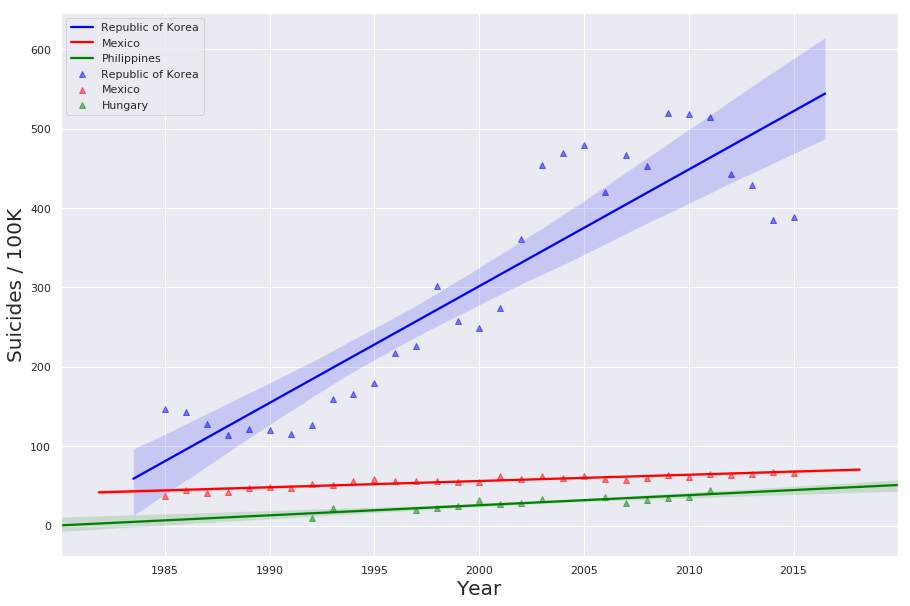

In [79]:
plt.scatter(se_P['year'], se_P['Republic of Korea'], label='Republic of Korea', color='blue', marker='^', alpha=.5)
ax=sns.regplot(x='year',y='Republic of Korea',data=se_P, scatter=None, color='blue',label="Republic of Korea")
plt.scatter(se_P['year'], se_P['Mexico'], label='Mexico', color='red', marker='^', alpha=.5)
ax2=sns.regplot(x='year', y='Mexico', data=se_P, marker="^",color="red",scatter=None,label="Mexico")
plt.scatter(se_P['year'], se_P['Philippines'], label='Hungary', color='green',marker='^', alpha=.5)
ax3=sns.regplot(x='year', y='Philippines', data=se_P, marker="x",color="green", scatter=None, label="Philippines")
ax3.set(xlabel='Year', ylabel='Suicides / 100K')
plt.legend(loc="best")
plt.show()

You can see the Republic of Korea (South Korea)'s suicidal trend has been increasing very rapidly, which is concerning.

**Conclusion**

- Overall, suicides have been decreasing since early 2000.
- Men have committed more sucides than women.
- "Silent" generation has committed the most suicides.
- There is a positive correlation between suicides and GDP per capita.
- Of those countries that have a linear relationship between Suicides/100K and Year, South Korea has the steepest increasing slope.